## Canada Housing Market Exploration

In [1]:
import numpy as np
import pandas as pd

#### Reading and Data Exploration

In [2]:
h = pd.read_csv('housing.csv')

In [3]:
#first 10 rows of the data frame
h.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
#column data type info
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Numerical Information for each column
h.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


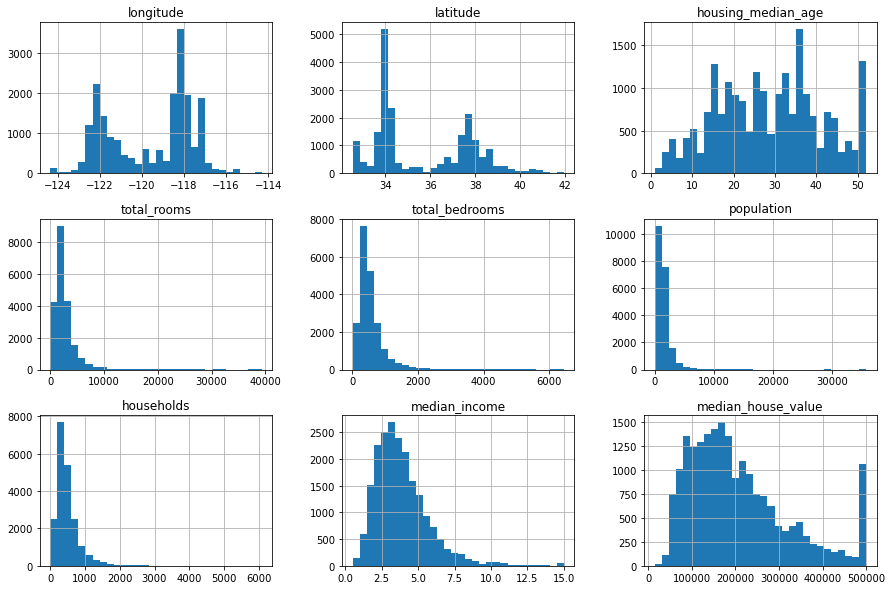

In [6]:
#Histograms of all the features in our data
import matplotlib.pyplot as plt
h.hist(bins=30, figsize=(15,10))
plt.show()

### Data Visualization

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

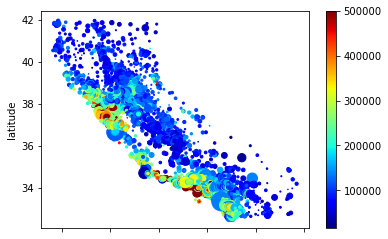

In [7]:
sizes = h['population']/100
colors = h['median_house_value']
h.plot.scatter(x='longitude', y='latitude',s=sizes,c=colors,cmap='jet')

### Correlation Matrix

In [8]:
#Understanding the correlation between our features to see how related they are.
correlation_matrix = h.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [9]:
#descening value of correlation with median house value.
correlation_matrix['median_house_value'].sort_values(key= abs, ascending=False)

median_house_value    1.000000
median_income         0.688075
latitude             -0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude            -0.045967
population           -0.024650
Name: median_house_value, dtype: float64

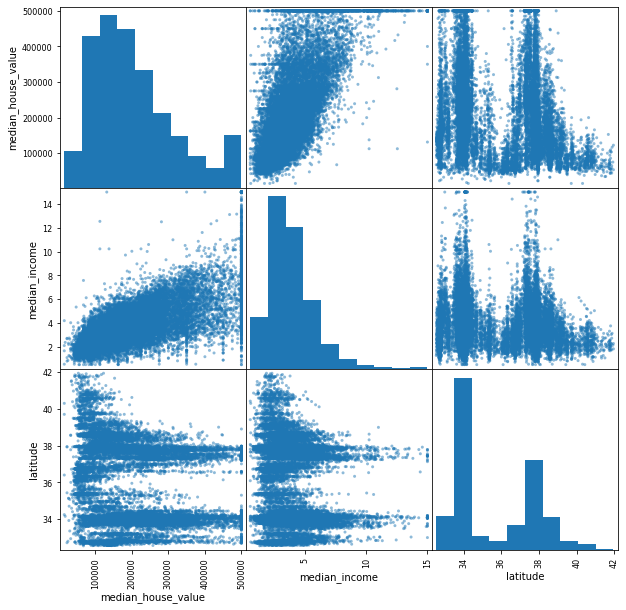

In [10]:
#isolation of top 3 columns wrt median house value
scatter_df = h[['median_house_value','median_income','latitude']]
pd.plotting.scatter_matrix(scatter_df,figsize=(10,10))
plt.show()

### Fill Missing Values

In [11]:
#Let's check if we have any null values.
h.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
#fill in all the null values with the median of the total bedroom column. This is a method of refilling null values with a central tendency metric.
median_bedroom = h['total_bedrooms'].median()
h.fillna(value=median_bedroom, inplace=True)
h.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
# Make three new columns to gain more insight on feature relationships.
h['rooms_per_household'] = h['total_rooms']/ h['households']
h['bedrooms_per_room'] = h['total_bedrooms']/ h['total_rooms']
h['population_per_household'] = h['population']/ h['households']

### Implementing a One Hot Encoder

In [14]:
h['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
df_OP = h[['ocean_proximity']]
df_OP_1hot = cat_encoder.fit_transform(df_OP)
df_OP_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [16]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [17]:
# Attaching the encoders to each row in our data frame.
h['is_<1H OCEAN'] = df_OP_1hot[:,0]
h['is_INLAND'] = df_OP_1hot[:,1]
h['is_ISLAND'] = df_OP_1hot[:,2]
h['is_NEAR BAY'] = df_OP_1hot[:,3]
h['is_NEAR OCEAN'] = df_OP_1hot[:,4]
h

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,is_<1H OCEAN,is_INLAND,is_ISLAND,is_NEAR BAY,is_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,0.0,1.0,0.0,0.0,0.0


In [18]:
h.drop(columns='ocean_proximity',inplace=True)
h

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,is_<1H OCEAN,is_INLAND,is_ISLAND,is_NEAR BAY,is_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209,0.0,1.0,0.0,0.0,0.0


### Train/Test Split

In [19]:
#Splitting the whole DF into testing and training data. Allocating 20% of data points as test data
from sklearn.model_selection import train_test_split
X = h.drop(columns='median_house_value')
Y = h['median_house_value']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [21]:
#Fitting a linear regression model
lin_model = LinearRegression().fit(X_train,Y_train)

#Model Evaluation for Training Set
y_train_predict = lin_model.predict(X_train)
rmse_train_lin = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

#Model Evaluation for TESTING Set
y_test_predict = lin_model.predict(X_test)
rmse_test_lin = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [22]:
rmse_test_lin

72668.53837868207

In [23]:
#Fitting a ridge regression model.
ridge_model = Ridge().fit(X_train,Y_train)

#Model Evaluation for Training Set
y_train_predict_ridge = ridge_model.predict(X_train)
rmse_train_ridge = (np.sqrt(mean_squared_error(Y_train, y_train_predict_ridge)))

#Model Evaluation for TESTING Set
y_test_predict_ridge = ridge_model.predict(X_test)
rmse_test_ridge = (np.sqrt(mean_squared_error(Y_test, y_test_predict_ridge)))

In [24]:
rmse_test_ridge

72411.99987712521

In [25]:
#Fitting an SVR model.
SVR_model = SVR().fit(X_train,Y_train)

#Model Evaluation for Training Set
y_train_predict_SVR = SVR_model.predict(X_train)
rmse_train_SVR = (np.sqrt(mean_squared_error(Y_train, y_train_predict_SVR)))

#Model Evaluation for TESTING Set
y_test_predict_SVR = SVR_model.predict(X_test)
rmse_test_SVR = (np.sqrt(mean_squared_error(Y_test, y_test_predict_SVR)))


In [26]:
rmse_test_SVR

117230.9150201057